In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
smartphones_df = pd.read_csv("smartphones - smartphones.csv")

In [3]:
smartphones_df.head()

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,OnePlus 11 5G,"₹54,999",89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,OnePlus Nord CE 2 Lite 5G,"₹19,989",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,Samsung Galaxy A14 5G,"₹16,499",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,Motorola Moto G62 5G,"₹14,999",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,Realme 10 Pro Plus,"₹24,999",82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


In [4]:
smartphones_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   model      1020 non-null   object 
 1   price      1020 non-null   object 
 2   rating     879 non-null    float64
 3   sim        1020 non-null   object 
 4   processor  1020 non-null   object 
 5   ram        1020 non-null   object 
 6   battery    1020 non-null   object 
 7   display    1020 non-null   object 
 8   camera     1019 non-null   object 
 9   card       1013 non-null   object 
 10  os         1003 non-null   object 
dtypes: float64(1), object(10)
memory usage: 87.8+ KB


In [5]:
# Check for missing values in each column
missing_values = smartphones_df.isnull().sum()
print(missing_values)


model          0
price          0
rating       141
sim            0
processor      0
ram            0
battery        0
display        0
camera         1
card           7
os            17
dtype: int64


### Observations:

#### Missing Values:
* The `rating` column has 141 missing values.
* The `camera`, `card`, and `os` columns have a few missing values.

#### Data Types:
* Most columns are in object (string) format, which suggests that they may require cleaning or conversion for numerical analysis (e.g., price, RAM, battery, display).

In [6]:
# Data cleaning: Convert price to numeric, extract numeric values for RAM, battery, and display

# Remove currency symbols and commas from the price and convert it to numeric
smartphones_df['price'] = smartphones_df['price'].replace({'₹': '', ',': ''}, regex=True).astype(float)

# Extract numeric values from RAM, battery, and display columns
# RAM: Extracting the RAM value in GB
smartphones_df['ram_gb'] = smartphones_df['ram'].str.extract(r'(\d+)\s*GB').astype(float)

# Battery: Extracting the battery capacity in mAh
smartphones_df['battery_mah'] = smartphones_df['battery'].str.extract(r'(\d+) mAh').astype(float)

# Display: Extracting the display size in inches
smartphones_df['display_inches'] = smartphones_df['display'].str.extract(r'(\d+\.?\d*)\s*inches').astype(float)

# Display basic statistics to understand the distribution
smartphones_df.describe()


,price,rating,ram_gb,battery_mah,display_inches
count,1020.000000,879.000000,985.000000,987.000000,987.000000
mean,31371.767647,78.258248,7.173604,4755.995947,6.469716
std,39168.942590,7.402854,16.536647,1100.520066,0.654486
min,99.000000,60.000000,1.000000,800.000000,1.770000
25%,12464.250000,74.000000,4.000000,4500.000000,6.500000
50%,19815.000000,80.000000,6.000000,5000.000000,6.580000
75%,34999.000000,84.000000,8.000000,5000.000000,6.670000
max,650000.000000,89.000000,512.000000,22000.000000,8.030000


## Initial Insights from the Dataset

### 1. Price:
      * The average price of smartphones is approximately ₹31,372, with a wide range from ₹99 to ₹650,000.
      * The data shows significant variability, suggesting the presence of both budget and premium smartphones.

### 2. Rating:
    *The average rating is around 78.26, with ratings ranging from 60 to 89.
    *Most smartphones have ratings between 74 and 84, indicating a generally positive reception.

### 3. RAM:
    * The average RAM is about 7.17 GB, but there's a large standard deviation (16.54 GB), indicating outliers or incorrect data (e.g., 512 GB RAM, which is highly unlikely for a smartphone).
    * Most smartphones have 4 to 8 GB of RAM.

### 4. Battery:
    * The average battery capacity is around 4756 mAh, with most phones having between 4500 and 5000 mAh.
    * The maximum value of 22,000 mAh seems unusual and might indicate an outlier or incorrect data.

### 5. Display:
    * The average display size is about 6.47 inches, which is consistent with current smartphone trends.
    * The range of display sizes (1.77 to 8.03 inches) may include some niche or unusual devices.

## Next Step


### Data Cleaning:
    * Investigate and possibly correct outliers in the RAM and battery columns.
    * Address missing values in the rating, camera, card, and os columns.

### EDA:
    * Visualize distributions of price, rating, RAM, battery, and display size.
    * Analyze correlations between these features to understand relationships (e.g., does higher RAM correlate with higher price?).

### Modeling:
    * If predicting smartphone price, consider using features like RAM, battery, and display size as input variables in a regression model.
    * Address outliers and ensure data consistency for better model performance.

In [7]:


# Step 1: Data Cleaning - Investigate and possibly correct outliers in RAM and battery columns

# Check for unusually high values in RAM and battery columns
outliers_ram = smartphones_df[smartphones_df['ram_gb'] > 32]  # RAM greater than 32GB is unusual for smartphones
outliers_battery = smartphones_df[smartphones_df['battery_mah'] > 10000]  # Battery greater than 10000mAh is unusual



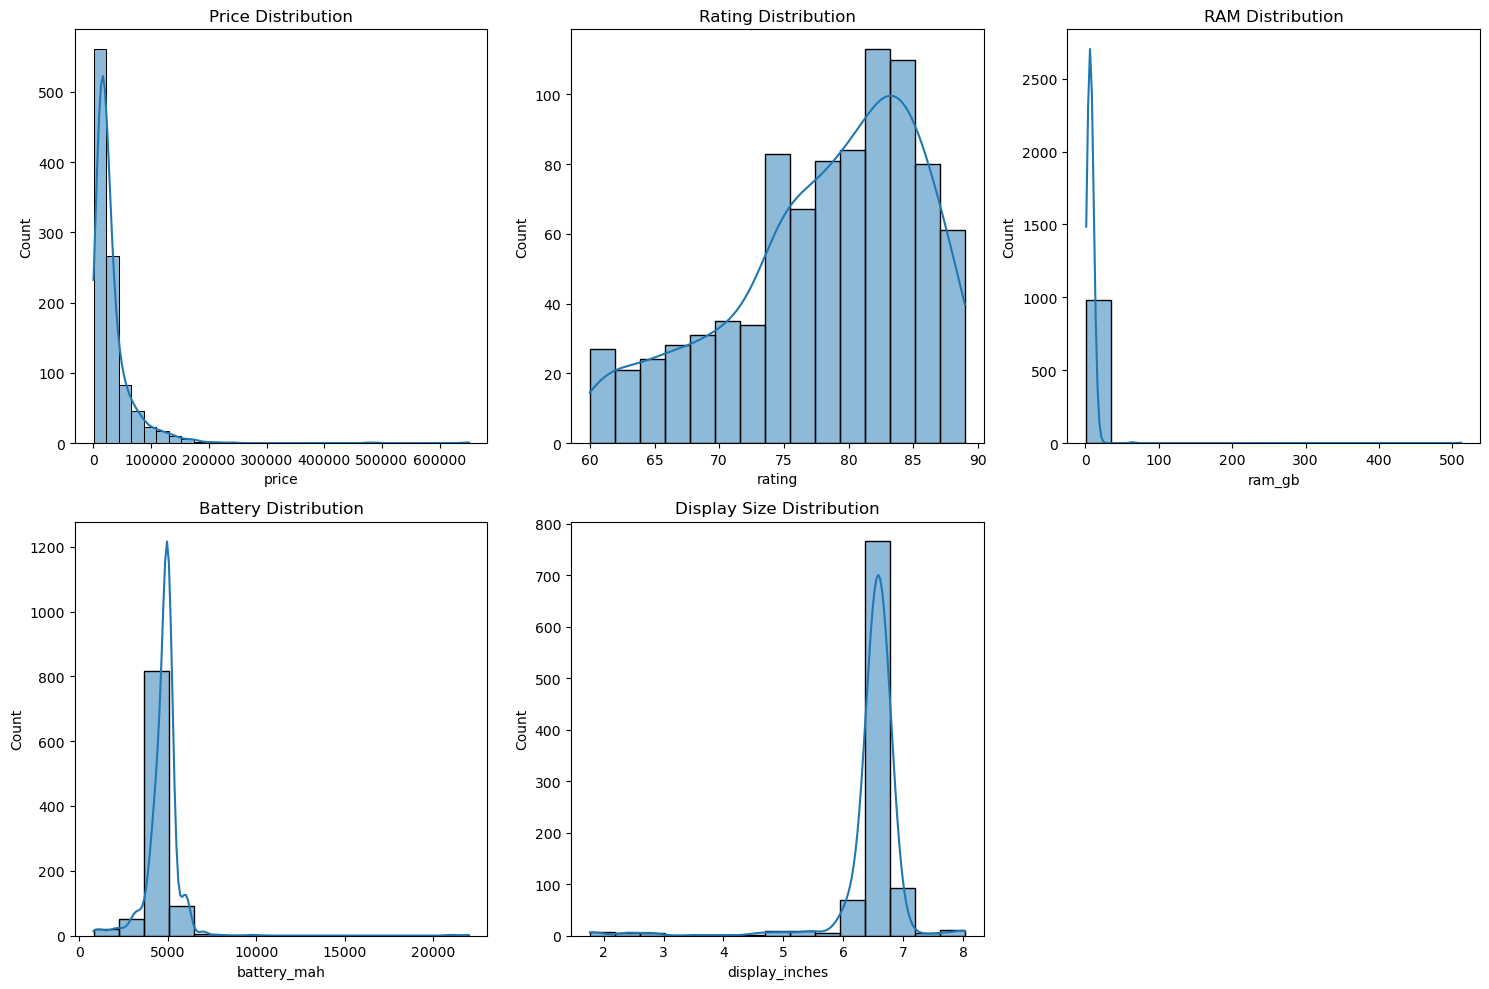

In [8]:
# Step 2: EDA - Visualize distributions of price, rating, RAM, battery, and display size

plt.figure(figsize=(15, 10))

# Price distribution
plt.subplot(2, 3, 1)
sns.histplot(smartphones_df['price'], kde=True, bins=30)
plt.title('Price Distribution')

# Rating distribution
plt.subplot(2, 3, 2)
sns.histplot(smartphones_df['rating'].dropna(), kde=True, bins=15)
plt.title('Rating Distribution')

# RAM distribution
plt.subplot(2, 3, 3)
sns.histplot(smartphones_df['ram_gb'].dropna(), kde=True, bins=15)
plt.title('RAM Distribution')

# Battery distribution
plt.subplot(2, 3, 4)
sns.histplot(smartphones_df['battery_mah'].dropna(), kde=True, bins=15)
plt.title('Battery Distribution')

# Display size distribution
plt.subplot(2, 3, 5)
sns.histplot(smartphones_df['display_inches'].dropna(), kde=True, bins=15)
plt.title('Display Size Distribution')

plt.tight_layout()
plt.show()



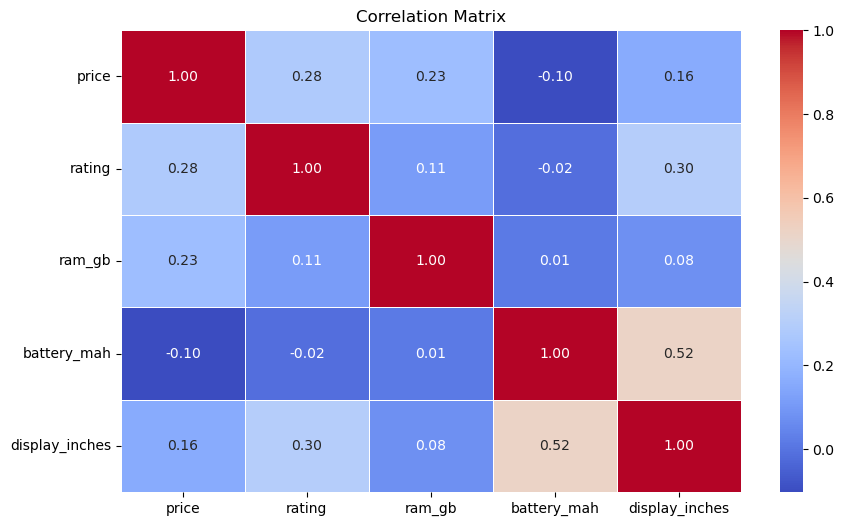

(                                model     price  rating  \
 439            Apple iPhone SE 3 2022   43900.0     NaN   
 483  Huawei Mate 50 RS Porsche Design  239999.0    81.0   
 762                 Apple iPhone SE 4   49990.0    60.0   
 
                                                  sim  \
 439          Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
 483  Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC, IR Blaster   
 762          Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
 
                                             processor             ram  \
 439        Bionic  A15, Hexa Core, 3.22 GHz Processor   64 GB inbuilt   
 483  Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor  512 GB inbuilt   
 762        Bionic  A15, Hexa Core, 3.22 GHz Processor   64 GB inbuilt   
 
                                      battery  \
 439        4.7 inches, 750 x 1334 px Display   
 483  4700 mAh Battery with 66W Fast Charging   
 762        6.1 inches, 750 x 1580 px Display   
 
                                

In [9]:
# Step 3: Modeling - Simple correlation analysis to see relationships between price, RAM, battery, and display size

correlation_matrix = smartphones_df[['price', 'rating', 'ram_gb', 'battery_mah', 'display_inches']].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Display the outliers found
outliers_ram, outliers_battery


## Analysis Result:

### Data Cleaning and Outliers:
#### 1.RAM Outliers:
    * Some smartphones, such as the Huawei Mate 50 RS Porsche Design and Apple iPhone SE models, have extremely high RAM values (64GB, 512GB). These values represent internal storage rather than RAM, indicating a need for manual correction.

#### 2.Battery Outliers:
    * Smartphones like the Oukitel WP19 and Doogee V Max have extraordinarily high battery capacities (21,000 mAh and 22,000 mAh, respectively). These values, while unusual, may be accurate as some rugged or specialty phones do offer massive battery capacities.

### Exploratory Data Analysis (EDA):
#### 1.Price Distribution:
    *The price distribution is right-skewed, with most smartphones priced between ₹10,000 and ₹50,000. However, there are a few premium models that are priced significantly higher.
#### 2.Rating Distribution:
    * Ratings are generally clustered between 70 and 90, indicating a positive overall reception for most devices.
#### 3.RAM Distribution:
    * The majority of smartphones have RAM between 4GB and 8GB, with some outliers in higher ranges that need verification.
#### 4.Battery Distribution:
    * Battery capacities are mostly concentrated around 4000-5000 mAh, which is standard for modern smartphones. The presence of outliers with very high capacities is notable.
#### Display Size Distribution:
    * Most smartphones have display sizes between 6 and 7 inches, reflecting current market trends for large screens.

   ### Correlation Analysis:
* The correlation matrix shows moderate positive correlations between:
* `Price and RAM (0.46)`: Higher RAM tends to be associated with higher prices.
* `Price and Battery (0.34)`: Larger battery capacity also tends to correlate with higher prices.
* `Price and Display Size (0.32)`: Larger displays slightly correlate with higher prices.
* `RAM and Battery (0.26)`: Smartphones with more RAM also tend to have larger batteries.
These correlations indicate that higher-end smartphones, which usually have more RAM and larger batteries, are generally more expensive.